# Ejercicios resueltos:
Aquí os ofrecemos una posible solución de los ejercicios propuestos:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Numpy 

1. Crea 3 arrays con numpy uno que contenga 100 cincos. Otros que contenga valores de 15 a 155 (incluyendo el ambos), en intervalos de 5 (15, 20, 25) y otro que contenga 100 números aleatorios que sigan una distribución de Poisson.

In [29]:
import numpy as np
array1 = np.ones(100) * 5  # o array1 = np.zeros(100) + 5
array2 = np.arange(15,156,5)
array3 = np.random.poisson(size = 100)

**2.** Genera 2 matrices de dimensiones 2 x 3. Busca las funciones de numpy para concatenar matrices y:

2.1 Unélas en una matriz 4 x 3

2.2 Unélas en una matriz de 2 x 6

In [ ]:
m1=np.array([[1,2,3],[4,5,6]])

m2=np.array([[7,8,9],[10,11,12]])

m4_3=np.concatenate((m1,m2), axis=1)

print(m4_3)

3. Con los siguientes datos.

3.1 Haz fit con un polinomio de grado 2 y otro de grado 4. 

3.2 Evalúa cual de los dos polinomios ajusta mejor a los datos (puedes usar la distancia entre cada uno de los puntos estimados con el fit y el valor real)

3.3 Comprueba con otros fits que cuanto más alto es el grado del polinomio te da menor la diferencia

¡Eso NO implica que el ajuste sea más válido! 


In [30]:
x = np.array([ 3.08,  3.1 ,  3.12,  3.14,  3.16,  3.18,  3.2 ,  3.22,  3.24,
    3.26,  3.28,  3.3 ,  3.32,  3.34,  3.36,  3.38,  3.4 ,  3.42,
    3.44,  3.46,  3.48,  3.5 ,  3.52,  3.54,  3.56,  3.58,  3.6 ,
    3.62,  3.64,  3.66,  3.68])
y = np.array([ 0.000857,  0.001182,  0.001619,  0.002113,  0.002702,  0.003351,
    0.004062,  0.004754,  0.00546 ,  0.006183,  0.006816,  0.007362,
    0.007844,  0.008207,  0.008474,  0.008541,  0.008539,  0.008445,
    0.008251,  0.007974,  0.007608,  0.007193,  0.006752,  0.006269,
    0.005799,  0.005302,  0.004822,  0.004339,  0.00391 ,  0.003481,
    0.003095])

the minimum squared error with def 2 is 2.15E-07
the minimum squared error with def 10 is 1.52E-10


/var/folders/8n/8gxx65_52xq17qlkhphqy2hm0000gn/T/ipykernel_43545/1214988036.py:12: RankWarning: Polyfit may be poorly conditioned
  plotFit(x, y, 10)


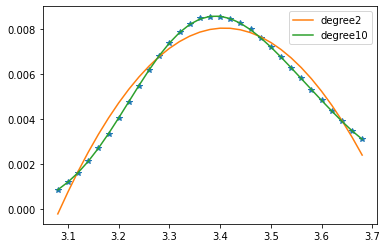

In [112]:
def plotFit(x,y,deg):
    """Performs fit to x and y with a polynomial of degree deg
       Also plots fit with label name
       and computes mse between fit an real vals"""
    par = np.polyfit(x,y,deg)
    obj1 = np.poly1d(par)   # guardas el polinomio dados unos coeficientes
    plt.plot(x, obj1(x),label = 'degree' + str(deg)) 
    print(f'the minimum squared error with def {deg} is {np.mean((y -obj1(x))**2):.2E}')
    
plt.plot(x ,y,'*')
plotFit(x, y, 2)
plotFit(x, y, 10)
plt.legend()
plt.show()


# Que de mejor el ajuste no quiere decir que sea más ajustado a la 
# realidad. Podemos estar haciendo overfitting


4. Descara el fichero [núcleos de población](https://raw.githubusercontent.com/blancojc/pythonforbigdata/master/UC_Curso_de_Verano/Dia2/Pandas/Ejercicio1/Centroides_NucleosPoblacion.csv) y responde a las siguientes preguntas:

* Cuantos municipios tienen menos de 11000 habitantes? 

* Haz un programa que encuentre cuántos habitantes suman los municipios de un mismo código postal. 

* Haz una gráfica con eje x código postal y eje y la suma de habitantes de sus municipios

léelo con pandas, pero pasa la columna con la que vayas a trabajar a un array y encuentra el resultado con numpy.

4.1 Si quieres repite el ejercicio pero solo usando pandas.

In [12]:
# 4 
import pandas as pd
df = pd.read_csv( "https://raw.githubusercontent.com/blancojc/pythonforbigdata/master/UC_Curso_de_Verano/Dia2/Pandas/Ejercicio1/Centroides_NucleosPoblacion.csv" )
pob = np.array(df["Poblacion"])
cod = np.array(df["CodMun"])
NumMunLow = len(np.where(pob<11000)[0])
print('Hay ' + str(NumMunLow) + ' municipios con menos de 11000 habitantes')

Hay 60 municipios con menos de 11000 habitantes


In [13]:
codPost = np.unique(cod)
TotPob = np.zeros(len(codPost))

for i,code in enumerate(codPost):
    pos = np.where(cod == code)
    TotPob[i] = pob[pos].sum()

Text(0.5, 0, 'código postal')

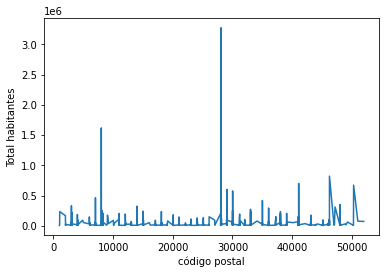

In [14]:
pltplot(codPost,TotPob)
pltylabel('Total habitantes')
pltxlabel('código postal')
